# Airbnb Price Prediction

**The particular dataset is taken from AirBNB new York dataset containing 16 attributes and 48896 observations. AirBNB price prediction becomes a big necessity nowadays because of the increasing number of listings going on every year throughout the entire united states. It becomes more easier for the new lister in this industry to know the rental price of their assets in daily basis depending upon various factors which governs this.** 


In this project ww will make the prediction of the AirBNB pricing in the New York city is emphasized based on different Machine Learning Algorithms namely KNN, Regression, Gaussian Naive Bayes, SVM, Random Forest and Kmean clusturing.

In [1]:
#importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
import numba
from numba import cuda
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV,cross_val_score, cross_validate
from sklearn.metrics import fbeta_score, make_scorer, SCORERS
%matplotlib inline

**We will first import the data set and visulize the dataset to see inside the data**

In [2]:
#getting dataset from csv file 
listing_df = pd.read_csv('listings_summary.csv')
neighbourhood_df = pd.read_csv('neighbourhoods.csv')
#reviews_df = pd.read_csv('reviews_summary.csv')

In [3]:
#printing dataset for listing
listing_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18461891,"Bright, comfortable 1B studio near everything!",916092,Connie Mae,Queens,Ditmars Steinway,40.774142,-73.916246,Entire home/apt,110,6,0,NaN,NaN,1,0
1,20702398,Quiet house on City Island,1457680,James,Bronx,City Island,40.849191,-73.786509,Private room,50,1,2,2017-10-01,2.00,1,169
2,6627449,Large 1 BDRM in Great location,13886510,Arlene,Bronx,City Island,40.849775,-73.786609,Entire home/apt,125,3,21,2017-09-26,0.77,1,363
3,19949243,Stay aboard a sailboat,1149260,MoMo,Bronx,City Island,40.848838,-73.782276,Entire home/apt,100,3,0,NaN,NaN,1,90
4,1886820,Quaint City Island Community.,9815788,Steve,Bronx,City Island,40.841144,-73.783052,Entire home/apt,300,7,0,NaN,NaN,1,365


In [4]:
#printing dataset for neighbourhood
neighbourhood_df.head()

,neighbourhood_group,neighbourhood
0,Bronx,Allerton
1,Bronx,Baychester
2,Bronx,Belmont
3,Bronx,Bronxdale
4,Bronx,Castle Hill


In [5]:
#printing data for reviews
reviews_df.head()

,listing_id,date
0,9452127,2016-01-05
1,9452127,2016-01-10
2,9452127,2016-01-11
3,9452127,2016-02-15
4,9452127,2016-02-22


In [8]:
#getting null coloums from listing dataset
set(listing_df.columns[listing_df.isnull().mean() > .1])

{'last_review', 'reviews_per_month'}

In [9]:
listing_df.isnull().mean()

id                                0.000000
name                              0.000632
host_id                           0.000000
host_name                         0.005235
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.213011
reviews_per_month                 0.213778
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

# Neighbourhood Groups and Reviews Visulization

Listing dataset containg Neighbourhood data and from that we can get useful information.
From this data we can make differant histogram like 

No. of Airbnb house Listings in Neighbourhood

No. of Airbnb Reviews in Neighbourhood Groups

Average Price of Airbnb Listing in NYC



No. of home listed in that neighbourhood: 
Manhattan        20370
Brooklyn         18470
Queens            4392
Bronx              791
Staten Island      294
Name: neighbourhood_group, dtype: int64
Manhattan        4074.0
Brooklyn         3694.0
Queens            878.4
Bronx             158.2
Staten Island      58.8
Name: neighbourhood_group, dtype: float64


Text(0.5, 1.0, 'No. of Airbnb house Listings in Neighbourhood')

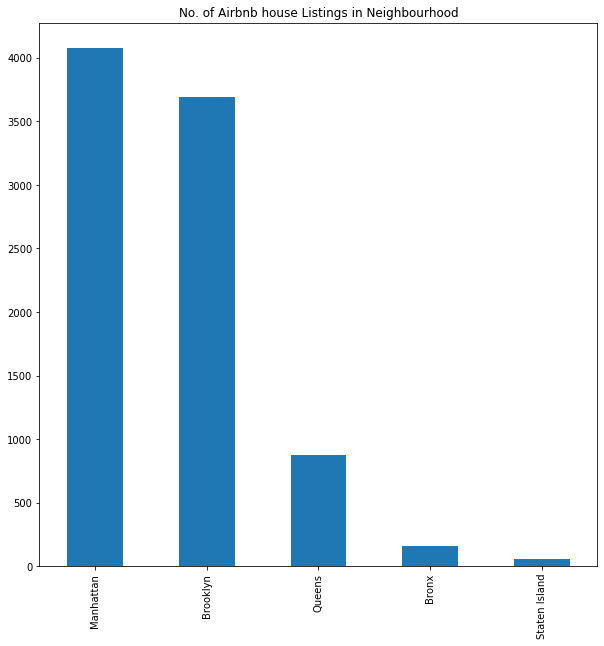

In [10]:
#get no. of home listed in that neighbourhood
n_group = listing_df.neighbourhood_group.value_counts().sort_values(ascending = False)
print('No. of home listed in that neighbourhood: \n{}'.format(n_group))
print(n_group/n_group.shape[0])

#print histogram for Neighbourhood Groups
(n_group/n_group.shape[0]).plot(kind = "bar", figsize = (10,10))
plt.title("No. of Airbnb house Listings in Neighbourhood")

From this we can see that high no of house listed in Manhattan while Bronx and Staten Island have lowest listing.


## Highest Airbnb reviews in NYC with List of neighbourhoods

From this we can see that no of reviews in perticular neighbuor hood group. As we seen above Manhattan is famous for listing more house, we have more no of reviews in the same area group.

In [11]:
#getting no of reviews in neighbourhood with neighbourhood group
area_review = listing_df.groupby(by = ["number_of_reviews"])["neighbourhood_group","neighbourhood"].max()[::-1]
print("No. of reviews in neighbourhood:\n{}".format(area_review))#printing the result
print("unique neighbourhood: {}".format(listing_df.neighbourhood_group.unique().tolist()))#print the unique value in neighbourhood group

No. of reviews in neighbourhood:
                  neighbourhood_group neighbourhood
number_of_reviews                                  
489                         Manhattan        Harlem
474                         Manhattan        Harlem
465                         Manhattan        Harlem
394                          Brooklyn  Williamsburg
383                          Brooklyn   South Slope
...                               ...           ...
4                       Staten Island      Woodside
3                       Staten Island      Woodside
2                       Staten Island      Woodside
1                       Staten Island      Woodside
0                       Staten Island      Woodside

[295 rows x 2 columns]
unique neighbourhood: ['Queens', 'Bronx', 'Brooklyn', 'Staten Island', 'Manhattan']


**Number of Reviews in Neighbourhood Groups**

This shows total no of reviews in perticular area or group and We can see from histogram that Manhattan have most no. of reviews while Bronx and staten Island gets least no of reviews.

In [12]:
#Number of Reviews in Neighbourhood Groups
area_review_2 = listing_df.groupby(by = ["neighbourhood_group"])["number_of_reviews"].sum()[::-1].sort_values(ascending = False)

Number of Reviews in Neighbourhood Groups:
neighbourhood_group
Manhattan        375675
Brooklyn         321546
Queens            87300
Bronx             13454
Staten Island      6194
Name: number_of_reviews, dtype: int64


Text(0.5, 1.0, 'No. of Airbnb Reviews in Neighbourhood Groups')

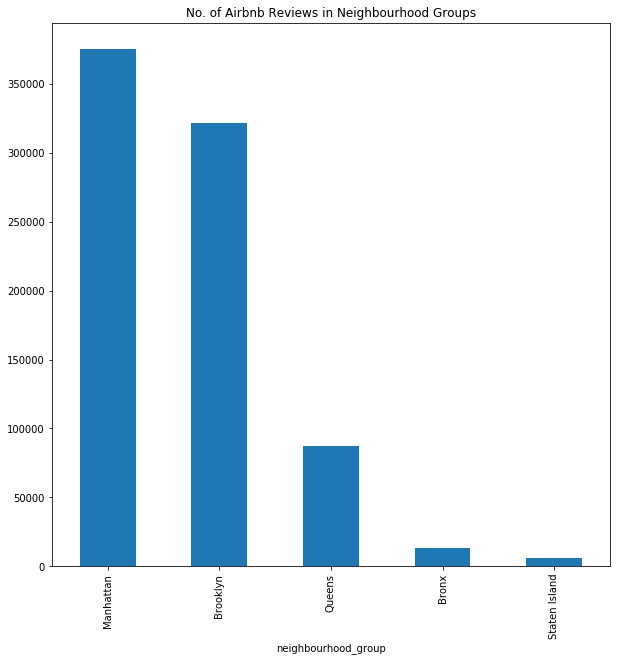

In [13]:
print('Number of Reviews in Neighbourhood Groups:\n{}'.format(area_review_2))
#getting the histogrma
area_review_2.plot(kind = "bar", figsize = (10,10))
plt.title("No. of Airbnb Reviews in Neighbourhood Groups")

## Average Price of Airbnb Listing in NYC Neighbourhood Groups

From this we can see that avg price in perticular neighbour hood group. From histogram, we can see that as Manhattan is clearly famous neighbourhood area in NYC, We have high avg price also in same area which is as high as 180$.

In [14]:
#Average Price of Airbnb Listing in NYC
area_price = listing_df.groupby(by = ["neighbourhood_group"])["price"].mean()[::-1].sort_values(ascending = False)

Average Price of Airbnb Listing in NYC:
neighbourhood_group
Manhattan        185.082867
Staten Island    126.517007
Brooklyn         120.701624
Queens            99.620674
Bronx             88.910240
Name: price, dtype: float64


Text(0.5, 1.0, 'Average Price of Airbnb Listing in NYC')

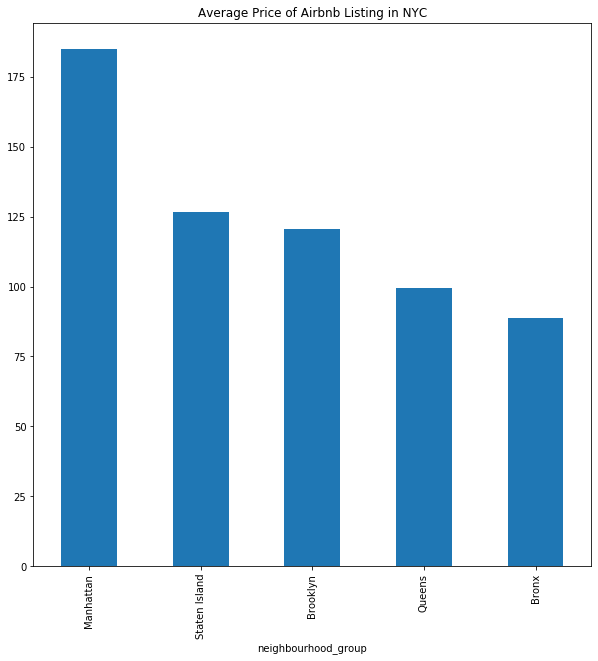

In [15]:
print('Average Price of Airbnb Listing in NYC:\n{}'.format(area_price))

area_price.plot(kind = "bar", figsize = (10,10))
plt.title("Average Price of Airbnb Listing in NYC")

In [16]:
price_review = pd.concat([area_review_2,area_price], axis = 1, sort = True).sort_values(by="number_of_reviews", ascending =  False)

In [17]:
print('Average Prices and Number of Reviews on Airbnb Listings in NYC:\n{}'.format(price_review))

Average Prices and Number of Reviews on Airbnb Listings in NYC:
               number_of_reviews       price
Manhattan                 375675  185.082867
Brooklyn                  321546  120.701624
Queens                     87300   99.620674
Bronx                      13454   88.910240
Staten Island               6194  126.517007


We can also see that Staten Island is not so famous place for listing house and as we dont have mush listing and reviews in the same area, still the avg price in staten island is second highest in all neighbourhood group.

## Reviews per Month and price of different Neighbourhood Groups in NYC

In this main 5 Neighbourhood group, we have sun differant  neighbourhood group also in NYC listing dataset.
We can get the data for no of reviews in that neighbourhood and price in that neighbourhood.

In [18]:
#Reviews per Month of different Neighbourhood Groups in NYC
per_month_review = listing_df.groupby(by = ["neighbourhood_group"])["reviews_per_month"].sum()[::-1].sort_values(ascending = False)

In [20]:
#Number of Reviews in all the neighbourhoods
area_review_3 = listing_df.groupby(by = ["neighbourhood"])["number_of_reviews"].sum()[::-1].sort_values(ascending = False)

In [21]:
area_review_3

neighbourhood
Williamsburg          70178
Bedford-Stuyvesant    67590
Harlem                54681
Hell's Kitchen        42906
East Village          40166
                      ...  
Gerritsen Beach           0
Westerleigh               0
New Dorp Beach            0
Rosebank                  0
Olinville                 0
Name: number_of_reviews, Length: 217, dtype: int64

In [22]:
area_price_2 = listing_df.groupby(by = ["neighbourhood"])["price"].mean()[::-1].sort_values(ascending = False)

In [23]:
area_price_2

neighbourhood
Westerleigh      801.500000
Randall Manor    531.363636
Mill Basin       500.000000
Riverdale        411.733333
Tribeca          380.624204
                    ...    
Mount Eden        48.625000
Hunts Point       48.500000
Morris Park       43.600000
Schuylerville     41.166667
Arden Heights     37.750000
Name: price, Length: 217, dtype: float64

In [24]:
#make dataof no of reviews in neighbourhood group
area_review_clean = area_review_2.copy(deep =True)

In [25]:
area_review_clean#printing the output

neighbourhood_group
Manhattan        375675
Brooklyn         321546
Queens            87300
Bronx             13454
Staten Island      6194
Name: number_of_reviews, dtype: int64

**Prices and Reviews**

In [26]:
#make data of the price of listing in the neighbourhood
area_price_clean = area_price.copy(deep =True)

In [27]:
area_price_clean

neighbourhood_group
Manhattan        185.082867
Staten Island    126.517007
Brooklyn         120.701624
Queens            99.620674
Bronx             88.910240
Name: price, dtype: float64

**Number of Reviews Per Month in all the neighbourhoods in NYC**

In [28]:
#Number of Reviews Per Month in all the neighbourhoods
permonth_review_2 = listing_df.groupby(by = ["neighbourhood"])["reviews_per_month"].sum()[::-1].sort_values(ascending = False)

In [29]:
permonth_review_2

neighbourhood
Bedford-Stuyvesant            4085.74
Williamsburg                  3859.66
Harlem                        3172.70
Hell's Kitchen                2780.52
Bushwick                      2558.35
                               ...   
Gerritsen Beach                  0.00
Bay Terrace, Staten Island       0.00
New Dorp Beach                   0.00
Rosebank                         0.00
Olinville                        0.00
Name: reviews_per_month, Length: 217, dtype: float64

In [30]:
#make data of per month reviews in neighbourhood
permonth_reviews_cleane = per_month_review.copy(deep =True)

In [31]:
permonth_reviews_cleane#printing the data

neighbourhood_group
Manhattan        22401.33
Brooklyn         19618.54
Queens            6898.63
Bronx             1072.04
Staten Island      405.25
Name: reviews_per_month, dtype: float64

**Reviews of Neighbourhood Groups and Prices of Airbnb in NYC**

Text(0.5, 1.0, 'No of Airbnb Reviews in Revised NYC Neighbourhood Groups')

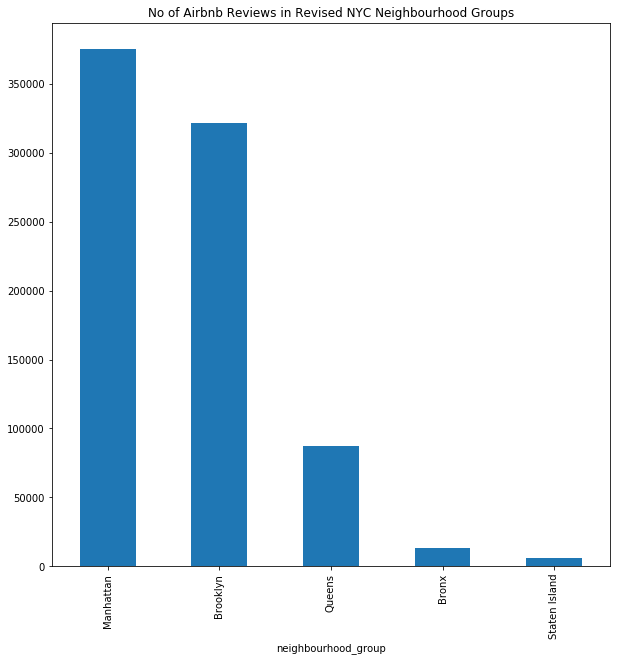

In [32]:
area_review_clean.plot(kind = "bar", figsize = (10,10))

plt.title("No of Airbnb Reviews in NYC Neighbourhood Groups")

**Reviews Per Month**

From this histogram we can see that we will get highest no of reviews in manhattan as listing is also high in the same neighbourhood group. That means more people visit the manhattan than other area in NYC and give reviews about the house listed in airbnb.

Text(0.5, 1.0, 'Reviews Per Month of Revised Airbnb Listing in NYC Neighbourhood Groups')

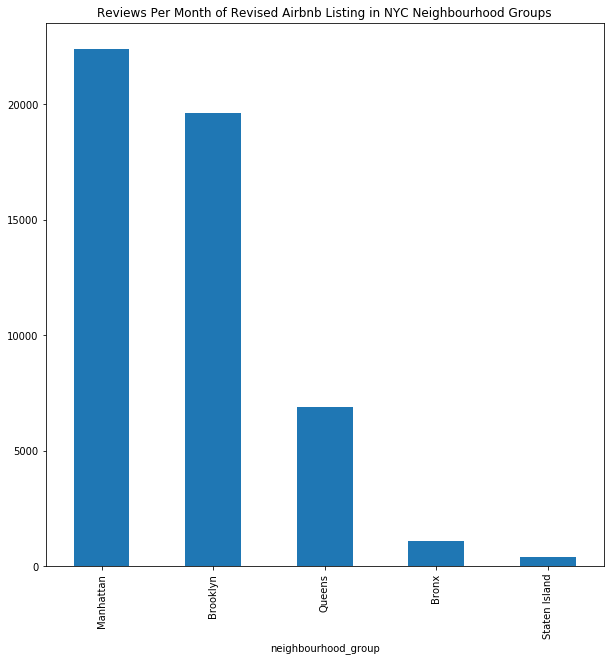

In [33]:
permonth_reviews_cleane.plot(kind = "bar", figsize = (10,10))
plt.title("Reviews Per Month of Revised Airbnb Listing in NYC Neighbourhood Groups")

**Airbnb Prices**

Text(0.5, 1.0, 'Average Price of Revised Airbnb Listing in NYC Neighbourhood Groups')

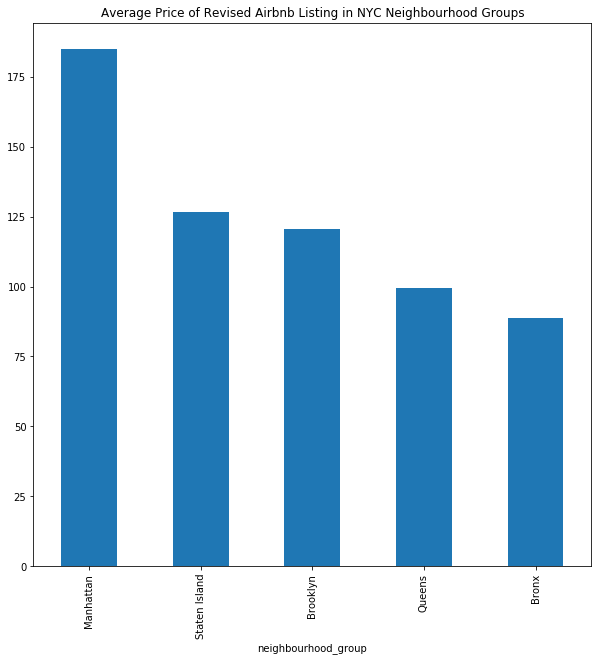

In [34]:
area_price_clean.plot(kind = "bar", figsize = (10,10))
plt.title("Average Price of Airbnb Listing in NYC Neighbourhood Groups")

**Airbnb Prices of the Highest Visited Neighbourhood Groups in NYC**

Text(0.5, 1.0, 'Average Price of Revised Airbnb Listing in NYC Neighbourhoods with atleast 10,000 Reviews')

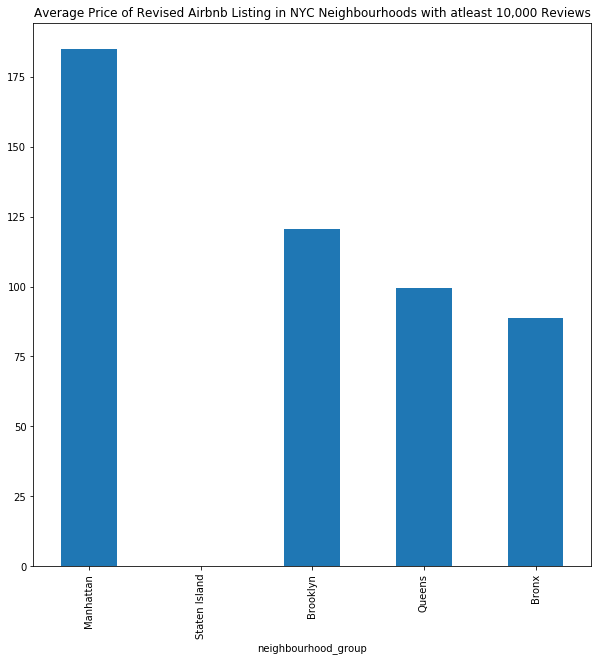

In [35]:
area_price_clean.where(area_review_clean > 10000).plot(kind = "bar", figsize = (10,10))
plt.title("Average Price of Airbnb Listing in NYC Neighbourhoods with atleast 10,000 Reviews")

**Standard deviation of Airbnb Prices in different Neighbour Groups to analyze how stable prices are in popular neighbourhood groups**

In [36]:
areas_and_prices_3_std = listing_df.groupby(by = ["neighbourhood_group"])["price"].std()[::-1].sort_values(ascending = False)

In [37]:
areas_and_prices_3_std

neighbourhood_group
Staten Island    311.045103
Manhattan        233.717036
Brooklyn         178.882444
Queens           174.882615
Bronx            147.269875
Name: price, dtype: float64

In [38]:
areas_and_prices_4_std = listing_df.groupby(by = ["neighbourhood"])["price"].std()[::-1].sort_values(ascending = False)

In [39]:
areas_and_prices_std_cleaned = areas_and_prices_3_std.copy(deep =True)

In [40]:
areas_and_prices_std_cleaned

neighbourhood_group
Staten Island    311.045103
Manhattan        233.717036
Brooklyn         178.882444
Queens           174.882615
Bronx            147.269875
Name: price, dtype: float64

Text(0.5, 1.0, 'STD of Prices of Revised Airbnb Listing in NYC Neighbourhood Groups')

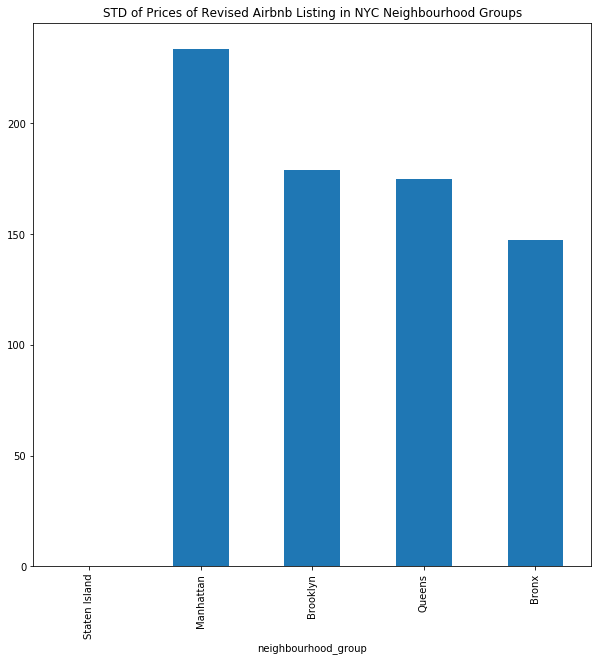

In [41]:
areas_and_prices_std_cleaned.where(permonth_reviews_cleane > 500).plot(kind = "bar", figsize = (10,10))
plt.title("STD of Prices of Revised Airbnb Listing in NYC Neighbourhood Groups")

In [42]:
max_prices = listing_df.groupby(by = ["neighbourhood_group"])["price"].quantile(q = .95, interpolation = 'linear')[::-1].sort_values(ascending = False)

In [43]:
max_prices

neighbourhood_group
Manhattan        449.00
Brooklyn         270.00
Staten Island    269.00
Queens           211.35
Bronx            190.00
Name: price, dtype: float64

In [44]:
mid_prices = listing_df.groupby(by = ["neighbourhood_group"])["price"].quantile(q = .5, interpolation = 'linear')[::-1].sort_values(ascending = False)

**After analyzing the data.....**

From above histogram we can see that, as standard deviation is almost zero in staten island, we can say that Staten island have most stable price for house listing in Airbnb. But as we can see, Manhattan have highest standard deviatin which is near to 300$, which means price is not stable in mahattan neighbourhood.

The variation in prices between its max to mid in Manhattan is very high, which is why standard deviation is very high in manhattan areas.

So we can say that Manhattan neighbourhood have most competitive listing of price in NYC while, Brooklyn and queens is stable and completitive.

## Histogram for all the variable in listing dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bff64a8>,
      dtype=object)

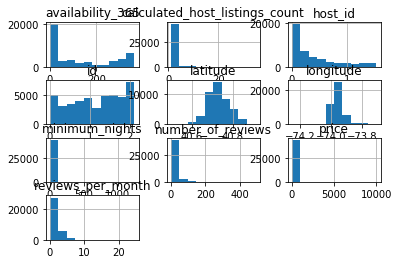

In [47]:
listing_df.hist()

## Correlation Map

This diagrma shows coorelation between all the variable in the listing datase. 

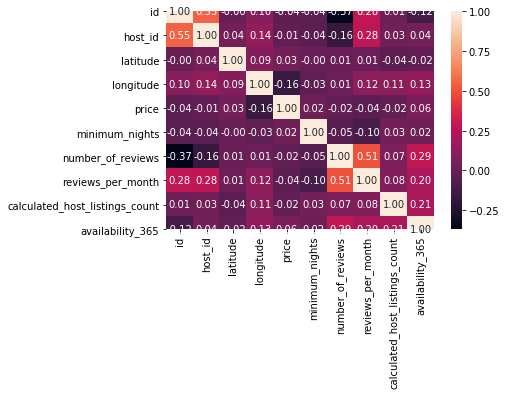

In [48]:
sns.heatmap(listing_df.corr(), annot = True, fmt = '.2f')

# Data Cleaning

Quality of data is critical in getting to final analysis. Any data which tend to be incomplete, noisy and inconsistent can effect the result. Data cleaning in data mining is the process of detecting and removing corrupt or inaccurate records from a record set, table or database.

**Finding missing values**

In [49]:
listing_df.isnull().sum()

id                                   0
name                                28
host_id                              0
host_name                          232
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9440
reviews_per_month                 9474
calculated_host_listings_count       0
availability_365                     0
dtype: int64

**Imputing Missing Values**

In [50]:
reviews_per_month_mean = listing_df.reviews_per_month.mean()

last_review_mode = listing_df.last_review.mode()[0]

print(reviews_per_month_mean)

print(last_review_mode)

1.4463677065694835
2017-09-24


In [51]:
listing_df.reviews_per_month.fillna(reviews_per_month_mean, inplace = True)

In [52]:
listing_df["last_review"].fillna(last_review_mode, inplace = True)

In [53]:
listing_df.isnull().sum()

id                                  0
name                               28
host_id                             0
host_name                         232
neighbourhood_group                 0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
last_review                         0
reviews_per_month                   0
calculated_host_listings_count      0
availability_365                    0
dtype: int64

**Cleaning the data**

In [54]:
listing_df.drop(columns = ["name", "host_name"])

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18461891,916092,Queens,Ditmars Steinway,40.774142,-73.916246,Entire home/apt,110,6,0,2017-09-24,1.446368,1,0
1,20702398,1457680,Bronx,City Island,40.849191,-73.786509,Private room,50,1,2,2017-10-01,2.000000,1,169
2,6627449,13886510,Bronx,City Island,40.849775,-73.786609,Entire home/apt,125,3,21,2017-09-26,0.770000,1,363
3,19949243,1149260,Bronx,City Island,40.848838,-73.782276,Entire home/apt,100,3,0,2017-09-24,1.446368,1,90
4,1886820,9815788,Bronx,City Island,40.841144,-73.783052,Entire home/apt,300,7,0,2017-09-24,1.446368,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44312,20530309,146582556,Brooklyn,Flatlands,40.618675,-73.932736,Private room,90,1,1,2017-08-27,0.810000,1,365
44313,20459907,146061056,Brooklyn,Bushwick,40.684681,-73.905174,Entire home/apt,199,3,0,2017-09-24,1.446368,1,138
44314,4287386,22257678,Queens,Rockaway Beach,40.583865,-73.819245,Entire home/apt,91,1,6,2017-09-24,3.910000,1,336
44315,20939747,44045569,Queens,Rosedale,40.679998,-73.720787,Entire home/apt,75,2,0,2017-09-24,1.446368,1,342


In [55]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Now for the analysis purpose we have spliut the dataset into test and train datase. for that we have to define our predicting variable. We will going to predict the price for the airbnb dataset. so here we are going to take price raw as prediction varible.

Dropping price for make price coloumn seperate

In [56]:
#for train and test split take price coloum seperate
price_raw = listing_df.price

In [57]:
price_raw.head()

0    110
1     50
2    125
3    100
4    300
Name: price, dtype: int64

**Predicting Airbnb Prices**

In [58]:
features_raw = listing_df.drop(["price", "name", "host_name", "last_review"], axis = 1)

In [59]:
features_raw.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,18461891,916092,Queens,Ditmars Steinway,40.774142,-73.916246,Entire home/apt,6,0,1.446368,1,0
1,20702398,1457680,Bronx,City Island,40.849191,-73.786509,Private room,1,2,2.000000,1,169
2,6627449,13886510,Bronx,City Island,40.849775,-73.786609,Entire home/apt,3,21,0.770000,1,363
3,19949243,1149260,Bronx,City Island,40.848838,-73.782276,Entire home/apt,3,0,1.446368,1,90
4,1886820,9815788,Bronx,City Island,40.841144,-73.783052,Entire home/apt,7,0,1.446368,1,365


In [60]:
features_raw.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [61]:
numerical = ["latitude", "longitude","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365"]

**Normalize Dataset**

The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. 

For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

In [62]:
#normalize dataset
scaler = MinMaxScaler()

features_normalized = features_raw.copy(deep = True)

features_normalized[numerical] = scaler.fit_transform(features_raw[numerical])

In [63]:
# Show an example of a record with scaling applied
features_normalized.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,18461891,916092,Queens,Ditmars Steinway,0.670155,0.620505,Entire home/apt,0.004003,0.000000,0.058579,0.0,0.000000
1,20702398,1457680,Bronx,City Island,0.853477,0.859368,Private room,0.000000,0.004090,0.081158,0.0,0.463014
2,6627449,13886510,Bronx,City Island,0.854903,0.859183,Entire home/apt,0.001601,0.042945,0.030995,0.0,0.994521
3,19949243,1149260,Bronx,City Island,0.852615,0.867162,Entire home/apt,0.001601,0.000000,0.058579,0.0,0.246575
4,1886820,9815788,Bronx,City Island,0.833822,0.865732,Entire home/apt,0.004804,0.000000,0.058579,0.0,1.000000


In [64]:
features_normalized.columns.shape

(12,)

In [65]:
features_final = pd.get_dummies(features_normalized)

In [66]:
features_final.columns.shape

(234,)

In [67]:
features_final.head()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,18461891,916092,0.670155,0.620505,0.004003,0.000000,0.058579,0.0,0.000000,0,...,0,0,0,0,0,0,0,1,0,0
1,20702398,1457680,0.853477,0.859368,0.000000,0.004090,0.081158,0.0,0.463014,1,...,0,0,0,0,0,0,0,0,1,0
2,6627449,13886510,0.854903,0.859183,0.001601,0.042945,0.030995,0.0,0.994521,1,...,0,0,0,0,0,0,0,1,0,0
3,19949243,1149260,0.852615,0.867162,0.001601,0.000000,0.058579,0.0,0.246575,1,...,0,0,0,0,0,0,0,1,0,0
4,1886820,9815788,0.833822,0.865732,0.004804,0.000000,0.058579,0.0,1.000000,1,...,0,0,0,0,0,0,0,1,0,0


**Missing values imputed with mean for Reviews Per Month**

In [68]:
features_final.columns[features_final.isnull().sum() > 1]

Index([], dtype='object')

In [69]:
features_final.reviews_per_month.fillna(features_final.reviews_per_month.mean(), inplace = True)

features_final.columns[features_final.isnull().sum()> 1]

Index([], dtype='object')

**Shuffle and Split Data**

Here we are going to split the dataset into 20% for testing and 80% for training dataset.

In [70]:
#test train split 20% test 80% train
X_train, X_test, y_train, y_test = train_test_split(features_final, list(price_raw.values), test_size = 0.2, random_state = 0)


Training set has (35453, 234) samples.
Testing set has (8864, 234) samples.


**Creating a function for  Training and testing Predicting**

In [71]:
import time
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
       #learner: ML algorithm to be trained and predicted
       #sample_size: the size of samples
       #X_train: features training set
       #y_train: training set
       #X_test: features testing set
       #y_test: testing set
    results = {}
    learner.fit(X_train[:sample_size],y_train[:sample_size]
        
    # then get predictions on the first 300 training samples(X_train) using .predict()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
            
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # Compute F-score 
    results['f_train'] = fbeta_score(y_train[:300],predictions_train, beta = 0.5, average ='micro')
    # Compute F-score on y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta = 0.5, average ='micro')
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    return results

# Analyze the dataset with differant ML algorithems

**First we will check the accuracy on test and train dataset for ML algorithem Gaussian Naive Bayes, RandomForest and KNeighbors**

In [72]:
A = GaussianNB()
B = RandomForestClassifier(random_state = 1)
C = KNeighborsClassifier(n_neighbors = 15)

samples = int(len(y_train))

# Collect results on the learners
results = {}

for clf in [A,B,C]:
    clf_name = clf.__class__.__name__
    
    results[clf_name] = {}
    
    #for i, samples in enumerate([samples_1, samples_10, samples_100]):
    results[clf_name] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

GaussianNB trained on 35453 samples.


/Users/jaydip/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier trained on 35453 samples.
KNeighborsClassifier trained on 35453 samples.


In [73]:
results

{'GaussianNB': {'acc_train': 0.05,
  'acc_test': 0.043659747292418775,
  'f_train': 0.05,
  'f_test': 0.043659747292418775},
 'RandomForestClassifier': {'acc_train': 0.9833333333333333,
  'acc_test': 0.06520758122743682,
  'f_train': 0.9833333333333333,
  'f_test': 0.06520758122743682},
 'KNeighborsClassifier': {'acc_train': 0.13,
  'acc_test': 0.03215252707581227,
  'f_train': 0.13,
  'f_test': 0.03215252707581227}}

**After getting Result of accuracy on test and train dataset....**

Random Forest Prediction Ensemble is most effective as accuracy is high as compare to two other algorithems.

**Grid Search on Random Forest Classifier**

Grid-searching is the process of scanning the data to configure optimal parameters for a given model. Grid-searching can be applied across machine learning to calculate the best parameters to use for any given model.

In [74]:
from sklearn.ensemble import RandomForestRegressor

def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)

    best = gs.best_estimator_
    return best

# gridsearchcv for Random Forest
forest =  RandomForestRegressor()

forest.fit(X_train, y_train)
print('Before cross-validation, the Random Forest Regressor score is: {}'.format(forest.score(X_test, y_test)), '\n')

parameters = {"max_depth": [3, 5, 8, 10, 12], 'max_features': [0.2, 0.4, 0.6, 0.8], 'min_samples_leaf': [2, 5, 8, 12]}
forest_new = cv_optimize(forest, parameters, X_train, y_train, n_jobs=10, n_folds=5, score_func=None)

print('Max Features: {}'.format(forest_new.max_features))
print('Max Depth: {}'.format(forest_new.max_depth))
print('Min Samples per Leaf: {}'.format(forest_new.min_samples_leaf))

best_forest = RandomForestRegressor(max_depth = forest_new.max_depth, max_features = forest_new.max_features, min_samples_leaf = forest_new.min_samples_leaf)
best_forest.fit(X_train, y_train)
print('After cross-validation, the random forest score is: {}'.format(best_forest.score(X_test, y_test)))

/Users/jaydip/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Before cross-validation, the Random Forest Regressor score is: 0.16517319748983983 

Max Features: 0.4
Max Depth: 12
Min Samples per Leaf: 8


/Users/jaydip/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


After cross-validation, the random forest score is: 0.22788652324895284


## Linear Regression Model

In [75]:
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)
y_test_preds = lm_model.predict(X_test)# Predictions here
r2_test = r2_score(y_test, y_test_preds)

r2_test

-5.422538039973616e+25

In [76]:
linear_mean_sq_err = mean_squared_error(y_test, y_test_preds)
linear_mean_sq_err ** 1/2

1.0928419253538521e+30

mean square error is the average of the square of the errors. The larger the number the larger the error. There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect. Since there is no correct answer, the MSE’s basic value is in selecting one prediction model over another.

Here we have r2=-5.4225e+25
r2 compares the fit of the chosen model with that of a horizontal straight line. If the chosen model fits worse than a horizontal line, then r2 is negative. The model makes no sense at all given these data. It is clearly the wrong model.

## K- nearest Neighbour

**Applying K-nearest Neighbours to Predict Airbnb prices in NYC**

k-Nearest Neighbors is an algorithm that is useful for making classifications/predictions when there are potential non-linear boundaries separating classes or values of interest. Conceptually, knn examines the classes/values of the points around it to determine the value of the point of interest.



In [77]:
features_normalized.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,18461891,916092,Queens,Ditmars Steinway,0.670155,0.620505,Entire home/apt,0.004003,0.000000,0.058579,0.0,0.000000
1,20702398,1457680,Bronx,City Island,0.853477,0.859368,Private room,0.000000,0.004090,0.081158,0.0,0.463014
2,6627449,13886510,Bronx,City Island,0.854903,0.859183,Entire home/apt,0.001601,0.042945,0.030995,0.0,0.994521
3,19949243,1149260,Bronx,City Island,0.852615,0.867162,Entire home/apt,0.001601,0.000000,0.058579,0.0,0.246575
4,1886820,9815788,Bronx,City Island,0.833822,0.865732,Entire home/apt,0.004804,0.000000,0.058579,0.0,1.000000


In [78]:
features_knn = features_normalized.drop(["neighbourhood","id", "host_id"], axis = 1)

In [79]:
features_knn.neighbourhood_group.unique().shape

(5,)

In [80]:
features_knn.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Queens,0.670155,0.620505,Entire home/apt,0.004003,0.000000,0.058579,0.0,0.000000
1,Bronx,0.853477,0.859368,Private room,0.000000,0.004090,0.081158,0.0,0.463014
2,Bronx,0.854903,0.859183,Entire home/apt,0.001601,0.042945,0.030995,0.0,0.994521
3,Bronx,0.852615,0.867162,Entire home/apt,0.001601,0.000000,0.058579,0.0,0.246575
4,Bronx,0.833822,0.865732,Entire home/apt,0.004804,0.000000,0.058579,0.0,1.000000


In [81]:
features_knn = pd.get_dummies(features_knn)

In [82]:
features_knn.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0.670155,0.620505,0.004003,0.000000,0.058579,0.0,0.000000,0,0,0,1,0,1,0,0
1,0.853477,0.859368,0.000000,0.004090,0.081158,0.0,0.463014,1,0,0,0,0,0,1,0
2,0.854903,0.859183,0.001601,0.042945,0.030995,0.0,0.994521,1,0,0,0,0,1,0,0
3,0.852615,0.867162,0.001601,0.000000,0.058579,0.0,0.246575,1,0,0,0,0,1,0,0
4,0.833822,0.865732,0.004804,0.000000,0.058579,0.0,1.000000,1,0,0,0,0,1,0,0


In [83]:
knn_model = KNeighborsRegressor(algorithm = "brute")

In [84]:
knn_model.fit(X_train,y_train)

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [107]:
knn_pred = knn_model.predict(X_test)
knn_r2_test = r2_score(y_test, knn_pred)
print(knn_r2_test)
print(knn_pred)

-0.1486523789708465
[165.2 111.4 139.4 ... 178.4 118.8 198.2]


**knn_pred is prediction for price with knn algorithem.**

In [86]:
knn_mean_sq_err = mean_squared_error(y_test, knn_pred)
knn_mean_sq_err ** (1/2)

215.17245563351597

Befor cross validation Knn mean square eroor is 215.1724.

## Crossvalidation of KNN Classifier

For knn classification, we are going to predict the the price using all the other variables within the data set.

In [87]:
# Creating foldings K for KNN
knn_neighbors = list(range(1,100))
neighbors = list(filter(lambda x: x % 2 != 0, knn_neighbors))

cv_scores = []
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = "accuracy")
    cv_scores.append(scores.mean())

/Users/jaydip/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/jaydip/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/jaydip/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/jaydip/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has o

/Users/jaydip/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/jaydip/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/jaydip/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/jaydip/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has o

In [88]:
MSE = [1 - x for x in cv_scores]
knn_neighbors[MSE.index(min(MSE))]
len(cv_scores)
print(neighbors)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]


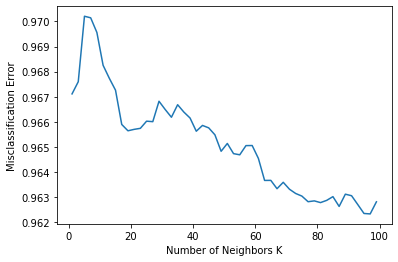

In [89]:
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
# plot error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

Graph shows diff k values from 0 to 100 and respective classificationj error.

## Crossvalidation of KNN Regressor

knn involves calculating distances between datapoints, we must use numeric variables only. This only applies to the predictor variables. The outcome variable for k-NN regression should already be a numeric variable.

In [90]:
# Creating k fold for KNN
knn_neighbors = list(range(1,100))
neighbors = list(filter(lambda x: x % 2 != 0, knn_neighbors))

cv_scores_knn_reg = []
#10-fold cross validation
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors = k, n_jobs = -1,algorithm = "brute")
    scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = "explained_variance", n_jobs = -1)
    cv_scores_knn_reg.append(scores.mean())

**Error Rate for Different K values for KNN Regressor**

In [91]:
rmse_val = [] #to store rmse values for different k
r2_val = []
for K in range(50):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred_knn_reg =model.predict(X_test) #make prediction on test set
    rmse_knn_reg = (mean_squared_error(y_test,pred_knn_reg)) ** (1/2) #calculate rmse
    r2_knn_reg = r2_score(y_test, pred_knn_reg)
    rmse_val.append(rmse_knn_reg) #store rmse values
    r2_val.append(r2_knn_reg)
    print('RMSE value for k = ' , K , 'is:', rmse_knn_reg)
    print('R2 value for k = ' , K , 'is:', r2_knn_reg)

RMSE value for k =  1 is: 251.31738055126235
R2 value for k =  1 is: -0.5669686685583315
RMSE value for k =  2 is: 233.62016824308597
R2 value for k =  2 is: -0.3540538259261796
RMSE value for k =  3 is: 221.60049358138946
R2 value for k =  3 is: -0.21830691907308797
RMSE value for k =  4 is: 219.6926079806824
R2 value for k =  4 is: -0.1974190213324556
RMSE value for k =  5 is: 215.17245563351597
R2 value for k =  5 is: -0.1486523789708465
RMSE value for k =  6 is: 212.29721742346763
R2 value for k =  6 is: -0.11815978265781713
RMSE value for k =  7 is: 208.5771501955907
R2 value for k =  7 is: -0.0793162670968306
RMSE value for k =  8 is: 207.73901111470576
R2 value for k =  8 is: -0.07065952207569914
RMSE value for k =  9 is: 207.46911328980605
R2 value for k =  9 is: -0.06787929357342204
RMSE value for k =  10 is: 206.8078067336743
R2 value for k =  10 is: -0.06108242564711297
RMSE value for k =  11 is: 206.63386218177465
R2 value for k =  11 is: -0.05929823877397444
RMSE value for

The RMSE value clearly shows it is going down for K value between 1 and 50. 

**RMSE KNN Regressor Plot**

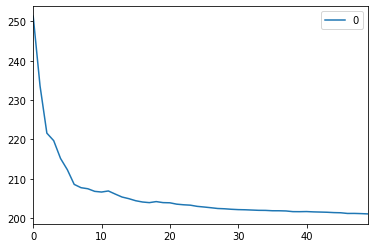

In [93]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

**R2 KNN Regressor Plot**

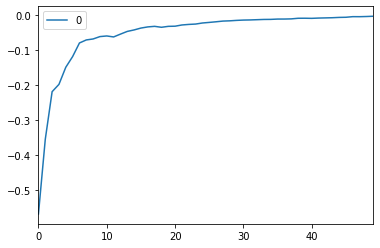

In [94]:
#plotting the rmse values against k values
curve = pd.DataFrame(r2_val) #elbow curve 
curve.plot()

In [95]:
#predicting on the test set and creating submission file
predict_knn_reg_2 = model.predict(X_test)

In [96]:
knn_mean_sq_err_2 = mean_squared_error(y_test, predict_knn_reg_2)

knn_mean_sq_err_2 ** (1/2)

201.07301768393359

After cross validation knn mean square error get reduce which is equal to **201.0730.**

**Grid Search on KNN Regressor**

As we can see from the root mean square error vs diff k value graph, error start getting constant after k value 30. So, we will find knn gerressor for best k value from 30 to 40.

In [97]:
params = {'n_neighbors':[30,31,32,33,34,35,36,37,38,39,40]}

knn_reg = KNeighborsRegressor()

model_knn_reg = GridSearchCV(knn_reg, params, cv=5)
model_knn_reg.fit(X_train,y_train)
model_knn_reg.best_params_

{'n_neighbors': 40}

In [98]:
knn = KNeighborsClassifier(n_neighbors = k)

**K = 40 - KNN Regressor Predictions**

In [99]:
knn_pred_final = KNeighborsRegressor(n_neighbors = 40)
model_knn_reg.fit(X_train,y_train)
predict_knn_reg_final = model.predict(X_test)

In [100]:
knn_pred_final

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                    weights='uniform')

In [101]:
knn_mean_sq_err_3 = mean_squared_error(y_test, predict_knn_reg_final)

rmse_knn_final = knn_mean_sq_err_3 ** (1/2)

rmse_knn_final

201.07301768393359

In [102]:
r2_knn_final = r2_score(y_test, predict_knn_reg_final )

r2_knn_final

-0.0030506312361711085

So, we can say that after cross validatin and after getting best k value which is 40, we will get best root mean square error **201.0730.**